# Brain-Computer Interfaces (Fall 2017, ELE 594) 
# Instructor: Yalda Shahriari  4th homework, 11/24/17 
# (The homework, is due by Dec 3th, 11:55 pm). 

In this part use the dataset you recorded yourselves for movement/rest conditions.   
1- (a) The data has been parsed by the left hand/right hand/feet/rest conditions. 

Compute the PSD of each condition for channels C3, C4, and Cz 
(compute the spectrum for each trial and average the spectra for each condition). 

For each channel, plot the resulting power spectral from 5-30 Hz for all conditions same plot, with separate subplots for each channel. 
Repeat for all subjects. 

Be sure to use common axes with clear labels for each subject. 

Hint: For PSD use 256-pt pwelch Matlab function. For parameters, use windows of 1-second with 50% overlap. 

All the PSD plots should be in 10log10 scale.  
(b) Repeat step 
(a) by applying a Common Average Reference (CAR) Filter. 
(c) Identify the peak alpha (8-12 Hz) and beta (13-30 Hz) frequencies for each subject and plot the topographies for each peak frequency and condition. Use separate subplots and colorbars for each subject. 
(d) Provide comments, observations, and comparisons for each step in a separate typed document.  

In [22]:
import scipy.io as spio

AD_mat = spio.loadmat(file_name='../../../datasets/bci/hw4/AD.mat')
AZ_mat = spio.loadmat(file_name='../../../datasets/bci/hw4/AZ.mat')
DB_mat = spio.loadmat(file_name='../../../datasets/bci/hw4/DB.mat')
NC_mat = spio.loadmat(file_name='../../../datasets/bci/hw4/NC.mat')
RJ_mat = spio.loadmat(file_name='../../../datasets/bci/hw4/RJ.mat')
SH_mat = spio.loadmat(file_name='../../../datasets/bci/hw4/SH.mat')
print(AD_mat.keys(), AD_mat['__header__'], AD_mat['__version__'], AD_mat['__globals__'])
print(AD_mat['signal_feet'].shape, AD_mat['signal_left'].shape, AD_mat['signal_rest'].shape, 
 AD_mat['signal_right'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'signal_feet', 'signal_left', 'signal_rest', 'signal_right']) b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 06 16:27:11 2017' 1.0 []
(670, 16, 20) (670, 16, 20) (670, 16, 22) (670, 16, 20)


For each subject, there are 4 matrices including left hand, right hand, rest, and feet conditions. Three different dimensions of each matrix is as below:
1_ signal time duration (0.2 Sec after onset of the stimulus till 0.2 Sec before offset of the stimulus)
2_ channels
3_ number of trials per run

Note: There was some problem in Nick’s data and now we only have 15 trials for each of his conditions.  So, all trial numbers in the subjects are the same but Nick’s. 

In [23]:
AD_mat_signal_feet, AD_mat_signal_left = AD_mat['signal_feet'], AD_mat['signal_left']
AD_mat_signal_rest, AD_mat_signal_right = AD_mat['signal_rest'], AD_mat['signal_right']
print(AD_mat_signal_feet.shape, AD_mat_signal_feet.dtype)
print(AD_mat_signal_left.shape, AD_mat_signal_left.dtype)
print(AD_mat_signal_right.shape, AD_mat_signal_right.dtype)
print(AD_mat_signal_rest.shape, AD_mat_signal_rest.dtype)

(670, 16, 20) float64
(670, 16, 20) float64
(670, 16, 20) float64
(670, 16, 22) float64


In [29]:
# # Example of scipy on how to use scipy.signal.welch function
# # Generate a test signal, a 2 Vrms sine wave at 1234 Hz, 
# # corrupted by 0.001 V**2/Hz of white noise sampled at 10 kHz.

import scipy.signal as spsignal
import numpy as np
import matplotlib.pyplot as mplot

# fs = 10e3 # 10e3=10,000=10kHz and 1e-3== 0.001
# N = 1e5 # 1e5=100,000
# amp = 2*np.sqrt(2) # square root
# freq = 1234.0
# noise_power = 0.001 * fs / 2
# time = np.arange(N) / fs
# x = amp*np.sin(2*np.pi*freq*time) # A*sin(2wt), w=2*Pi*f
# x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape) # additive noise with normal distribution

# # Related to the scipy example of the welch function usecase for power spectral density estimation
# # Compute and plot the power spectral density.
# # >>>
# # Pxx_den == power of X^2 (spectrum-related) density
# f, Pxx_den = spsignal.welch(x=x, fs=fs, nperseg=1024)
# # mplot.semilogy(f, Pxx_den)
# PSD_db = 10*np.log10(Pxx_den)
# mplot.plot(f, PSD_db)
# # mplot.ylim([0.5e-3, 1])
# mplot.xlabel('frequency [Hz]')
# mplot.ylabel('PSD [V**2/Hz]')
# mplot.show()

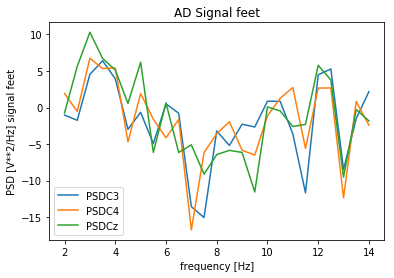

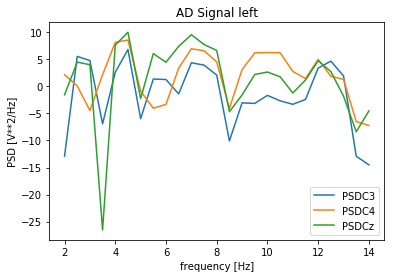

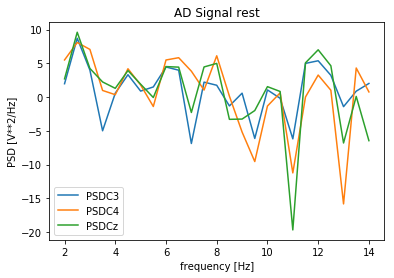

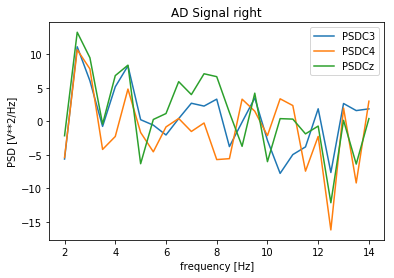

In [30]:
# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AD_mat_signal_feet[:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_feet[:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_feet[:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AD Signal feet')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz] signal feet')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AD_mat_signal_left[:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_left[:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_left[:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AD Signal left')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz]')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AD_mat_signal_rest[:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_rest[:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_rest[:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AD Signal rest')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz]')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AD_mat_signal_right[:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_right[:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AD_mat_signal_right[:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AD Signal right')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz]')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

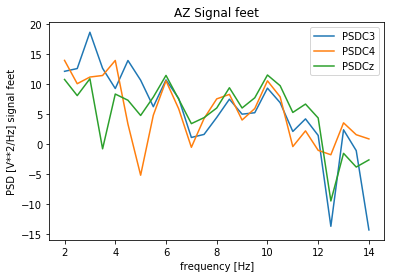

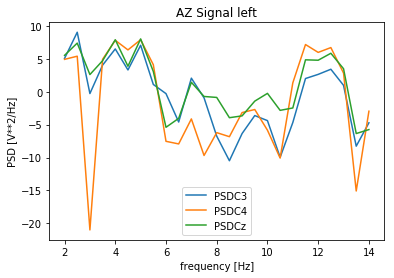

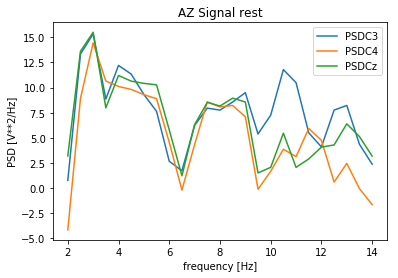

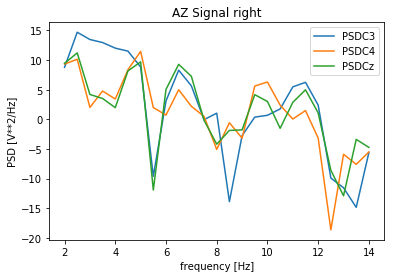

In [31]:
# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AZ_mat['signal_feet'][:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_feet'][:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_feet'][:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AZ Signal feet')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz] signal feet')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AZ_mat['signal_left'][:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_left'][:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_left'][:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AZ Signal left')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz]')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AZ_mat['signal_rest'][:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_rest'][:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_rest'][:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AZ Signal rest')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz]')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

# Compute and plot the power spectral density for the first channel of data
# # Data_LxCxN: L== sequence length, C == num channels, N== num epochs/trials/seqgments
# 5	-90	0.203	C3..
# 6	90	0.203	C4..
# 11	0	0	Cz..
# PSD from 5-30 Hz, alpha 8-13 Hz, beta 13-30 Hz
f, PSD = spsignal.welch(x=(AZ_mat['signal_right'][:, 4, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_right'][:, 5, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

f, PSD = spsignal.welch(x=(AZ_mat['signal_right'][:, 10, 0]), fs=256, nperseg=512)
PSD_db = 10*np.log10(PSD)
# mplot.plot(f, PSD_db) # PSD=Pxx_den
mplot.plot(f[5-1:30-1], PSD_db[5-1:30-1]) # PSD=Pxx_den

mplot.title('AZ Signal right')
mplot.xlabel('frequency [Hz]')
mplot.ylabel('PSD [V**2/Hz]')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz', 'PSDC3[5-1:30-1]', 'PSDC4[5-1:30-1]', 'PSDCz[5-1:30-1]'])
mplot.show()

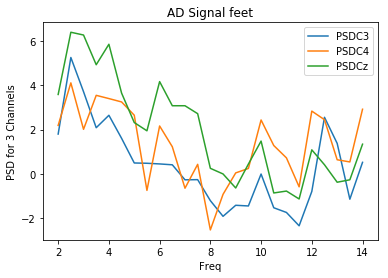

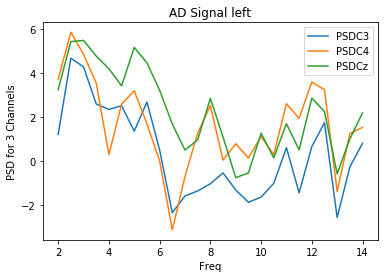

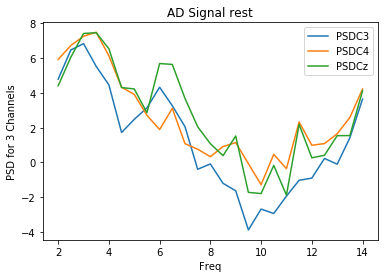

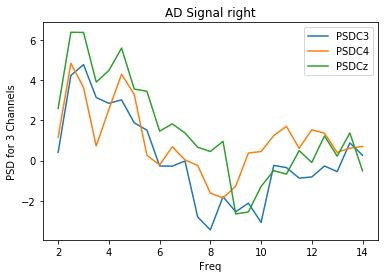

In [33]:
# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AD_mat_signal_feet.shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AD_mat_signal_feet[:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_feet[:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_feet[:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AD Signal feet')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AD_mat_signal_left.shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AD_mat_signal_left[:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_left[:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_left[:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AD Signal left')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AD_mat_signal_rest.shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AD_mat_signal_rest[:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_rest[:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_rest[:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AD Signal rest')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AD_mat_signal_right.shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AD_mat_signal_right[:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_right[:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AD_mat_signal_right[:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AD Signal right')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

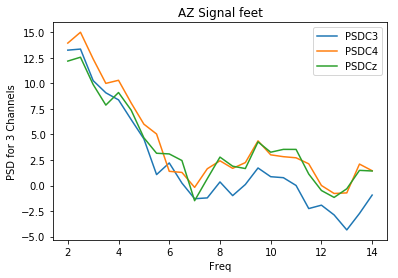

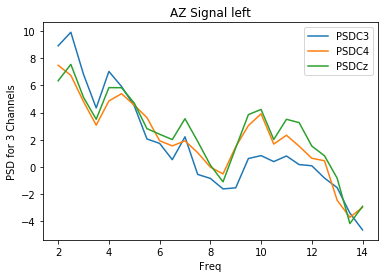

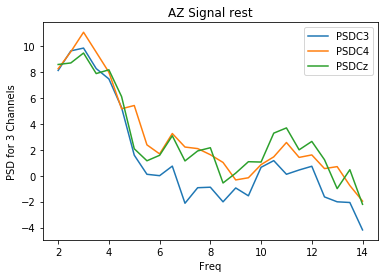

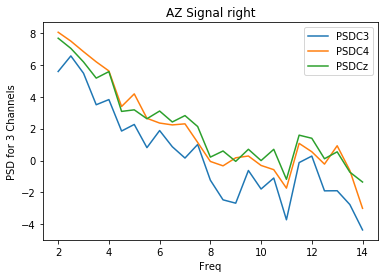

In [34]:
# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AZ_mat['signal_feet'].shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AZ_mat['signal_feet'][:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_feet'][:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_feet'][:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AZ Signal feet')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AZ_mat['signal_left'].shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AZ_mat['signal_left'][:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_left'][:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_left'][:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AZ Signal left')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AZ_mat['signal_rest'].shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AZ_mat['signal_rest'][:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_rest'][:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_rest'][:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AZ Signal rest')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

# Average the PSD for each channel for all trials for one subject first
lPSDC3, lPSDC4, lPSDCz = [], [], []

# AD_mat_signal_feet.shape: LxCxN
for eachN in range(0, AZ_mat['signal_right'].shape[2], 1): # all trials for one subject first
    # (start, stop, step)
    # PSD, one subject, ch4-5-10, all trials/epochs
    f, PSD = spsignal.welch(x=(AZ_mat['signal_right'][:, 4, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC3.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_right'][:, 5, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDC4.append(PSD_db)
    f, PSD = spsignal.welch(x=(AZ_mat['signal_right'][:, 10, eachN]), fs=256, nperseg=512)
    PSD_db = 10*np.log10(PSD)
    lPSDCz.append(PSD_db)
    
# print('len(lPSDC3), len(lPSDC4), len(lPSDCz):', len(lPSDC3), len(lPSDC4), len(lPSDCz))
PSDC3 = np.array(lPSDC3, dtype=PSD_db.dtype).mean(axis=0)
PSDC4 = np.array(lPSDC4, dtype=PSD_db.dtype).mean(axis=0)
PSDCz = np.array(lPSDCz, dtype=PSD_db.dtype).mean(axis=0)
# mplot.plot(f, PSDC3)
# mplot.plot(f, PSDC4)
# mplot.plot(f, PSDCz)
mplot.title('AZ Signal right')
mplot.plot(f[5-1:30-1], PSDC3[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDC4[5-1:30-1])
mplot.plot(f[5-1:30-1], PSDCz[5-1:30-1])
mplot.xlabel('Freq')
mplot.ylabel('PSD for 3 Channels')
mplot.legend(['PSDC3', 'PSDC4', 'PSDCz'])
mplot.show()

2- (a) Using the spectral estimation approach from step (1-b), 
extract the following four features: alpha-band bin from channel C3, beta-band bin from channel C3, alpha-band bin from channel C4, beta-band bin from channel C4. 

Use the trial averages as the observations. 
Using all of the data, compute the Pearson’s correlation coefficient between each of the features and the trial label (i.e., +1 for right hand trial, -1 for left hand trial). 
(b) Randomly select 70% of the data for training and the rest for test. 
Using the training data features, determine the mean of each class. 

Classify the test data based on the Euclidean distance from each class mean. 

Determine the overall performance (sensitivity, specificity, and accuracy).  

Hint: 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦= 𝑇𝑁𝑇𝑁+𝐹𝑃,𝑆𝑒𝑛𝑠𝑖𝑡𝑖𝑣𝑖𝑡𝑦= 𝑇𝑃𝑇𝑃+𝐹𝑁,𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦=𝑇𝑃+𝑇𝑁𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁 where TP is true positive, TN is true negative, FP is false positive, and FN is false negative. 

(c) Construct a naïve Bayesian classifier using the training data and compute the performance of the classifier when applied to the testing data. 

Optional (extra 10% credit): Repeat step (c) using a Fisher Linear Discriminant classifier. 